What are my targets, exactly?
* KC price or actual import price?

What are my features?
* Weather (up to harvest season)
* Grower economic forecast
* Grower political forecast (risk analysis)


Would it be better to track coffee ETFs based on physical commodities, or would futures be OK?

If tracking futures, don't those funds have access to the same information I do? Essentially, wouldn't I be reverse-engineering those funds? (If bad weather is in the news, the futures price goes up and my model tracks up too.) JO:US

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
# sns.set_palette("muted")
%matplotlib inline

## Webscraping ICO composite index

In [2]:
# import json
# import requests

# data_json = json.loads(requests.get("https://knoema.com/api/1.0/data/UNCTADFMCPI2015Aug?time=1979M10-2016M11&commodity=1000260,1000250,1000240,1000230,1000220,1000210,1000200,1000190&frequencies=M").text)
# list(data_json.keys())

In [3]:
# values_from_data = [data_json["data"][i]["Value"] for i in range(len(data_json["data"]))]
# times_from_data = [data_json["data"][i]["Time"] for i in range(len(data_json["data"]))]
# data_indexes = data_json["header"][0]["members"]

In [4]:
# dataframe = pd.DataFrame(columns = data_json["stub"][0]["members"], index = times_from_data)
# for index in data_json["data"]:
#     dataframe.ix[index["Time"], index["commodity"]] = index['Value']

# dataframe

# # organized as:
# # |______|_commodity_|_commodity_|
# # | Time | Value     | Value     |

In [50]:
# %%html
# <iframe src="https://knoema.com/resource/embed/UNCTADFMCPI2015Aug" allowtransparency="true" scrolling="no" frameborder="0" style="height:900px;width:940px;min-width:560px;"></iframe>

In [1]:
# %%html 
# <h1>ICO Glossary</h1>
# <iframe src = "http://www.ico.org/glossary.asp" style="height:400px;width:800px;min-width:560px;">ICO glossary</iframe>

In [2]:
# %%html 
# <h1>ICO Members</h1>
# <iframe src = "http://www.ico.org/members_e.asp?section=About_Us" style="height:400px;width:800px;min-width:560px;">ICO Members</iframe>


> Free market commodity prices, monthly, January 1960 - Novembre 2016
 	
> Title:	Free market commodity prices, monthly, January 1960 - Novembre 2016
Author:	UNCTAD
Category:	Commodities
Keywords:	commodities, prices, indices
 	 
> Notes:
 	
>Description:
This table presents monthly average free market prices for selected commodities exported by developing economies.  The monthly averages are calculated from daily quotations except in the case of the averages for wheat, cotton, tea, vegetable oilseeds and oils and cattle hides, which are calculated from weekly quotations.

> Coffee 
Average of daily prices. 
As from October 2001, I.C.A. 2001:
1. Ex-dock USA: Colombian mild Arabicas: Excelso, UGQ, screen size 14.
2. Ex-dock USA: Brazilian and other natural Arabicas: Santos 4.
3. Other mild Arabicas, weighted average of:
- 3.1. Ex-dock USA: El Salvador Central Standard, Guatemala Prime Washed, Mexico Prime Washed and Costa Rica Hard Bean.
- 3.2. Ex-dock EU: El Salvador Strictly High Grown, Guatemala Hard Bean, Nicaragua Strictly High Grown and Costa Rica Hard Bean.
4. Robustas, weighted average of:
- 4.1. Ex-dock USA: Côte d'Ivoire Grade 2, Uganda Standard, Indonesia EK Grade 4 and Vietnam Grade 2.
- 4.2. Ex-dock EU: Côte d'Ivoire Grade 2, Cameroon Grade 1, Indonesia EK Grade 4, Uganda Standard and Vietnam Grade 2.
5. Composite indicator price 1976 version, arithmetic mean of:
- Ex-dock USA: Other mild Arabicas
- Ex-dock USA: Robustas. 
As from October 2015, I.C.A. 2007:
6. ICO Composite indicator price, weighted as follows:
- 10% Colombian milds

> (54% USA and 46% EU)

> - 23% Other mild Arabicas

> (41% USA and 59% EU)

> - 30% Brazilian naturals

> (26% USA and 74% EU)

> - 37% Robustas

> (17% USA and 83% EU)


> For previous weights of I.C.A., please refer to the International Coffee Organization's (ICO) website. 
(International Coffee Organization (ICO), London, United Kingdom) 

In [6]:
raw_data = pd.read_csv("../datasets/us_monthlycommoditypriceaverages_03927558512071.csv", encoding = "ISO-8859-1", header = 1)

In [7]:
data = raw_data.drop(labels = 0).T
data.columns = data.loc["PERIOD", :]
data = data.drop(labels = ["PERIOD"])
data = data.apply(pd.to_numeric, errors = 'coerce')

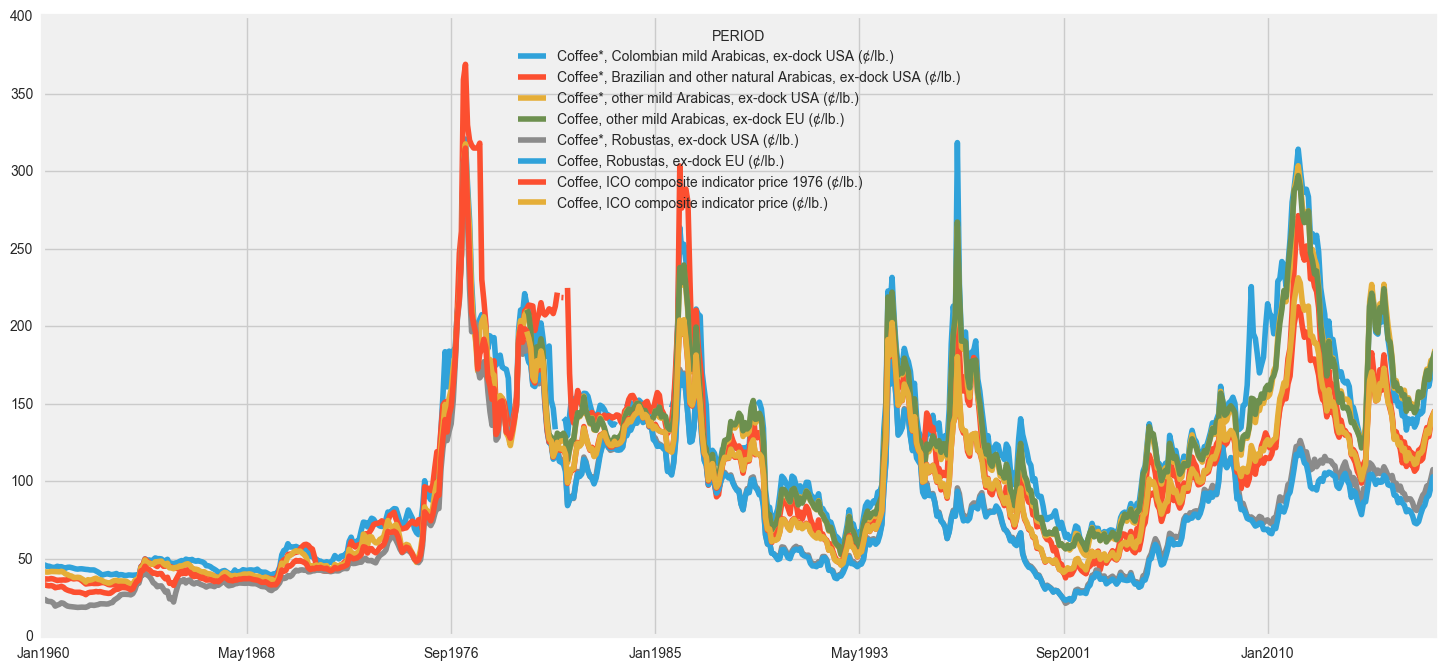

In [8]:
# data[["Coffee, ICO composite indicator price 1976 (¢/lb.)", "Coffee, ICO composite indicator price (¢/lb.)"]].plot(figsize=(16,8))
data.plot(figsize=(16,8))
sns.plt.show()

In [9]:
raw_xls_data = pd.read_excel("~/Downloads/Coffee Historical Prices.xls", skiprows = 4)

In [10]:
KC_futures_prices = raw_xls_data[["DATE", "CONTRACT (YYYY/MM)", "CLOSE"]]

In [11]:
KC_futures_prices.loc[:, "DATE"] = KC_futures_prices["DATE"].apply(pd.to_datetime)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
# KC_futures_prices["CLOSE"].plot()
#data.apply(pd.to_datetime)
#["Coffee, ICO composite indicator price (¢/lb.)"].plot()

In [13]:
coffee_producing_countries = pd.read_html(io = "https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production", header = 0)[0]

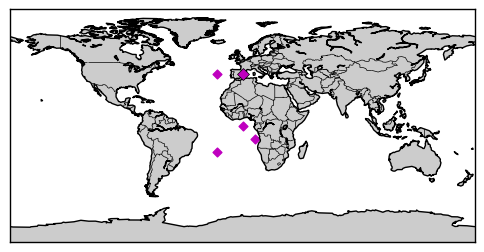

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
# map.drawparallels(range(34, 50, 2), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )

# map = Basemap(resolution='l', 
#               satellite_height=3000000.,
#               projection='nsper', 
#               lat_0 = 30., lon_0 = -27.,
#               llcrnrx=500000.,llcrnry=500000.,urcrnrx=2700000.,urcrnry=2700000.
#              )



map = Basemap()
x, y = map(0, 40)
map.plot(x, y, marker='D',color='m')

lons = [0, 10, -20, -20]
lats = [0, -10, 40, -20]

x, y = map(lons, lats)
map.scatter(x, y, marker='D',color='m')

map.fillcontinents()
map.drawcoastlines()
map.drawcountries()

plt.show()

In [49]:
coffee_producing_countries["Country"]

0                               Brazil
1                              Vietnam
2                             Colombia
3                            Indonesia
4                             Ethiopia
5                                India
6                               Mexico
7                            Guatemala
8                                 Peru
9                             Honduras
10                              Uganda
11                         Ivory Coast
12        Peoples Republic of China[2]
13                          Costa Rica
14                         El Salvador
15                           Nicaragua
16                    Papua New Guinea
17                             Ecuador
18                            Thailand
19                            Tanzania
20                  Dominican Republic
21                               Kenya
22                           Venezuela
23                            Cameroon
24                         Philippines
25    Democratic Republic

Brazil provides coffee crop information (production and planting area) for 2001--2016: 
http://www.conab.gov.br/

In [4]:
def set_to_dataframe(Country = None, State = None):
    return pd.DataFrame([Country, State], columns = ["Country", "State"])

In [3]:
set_to_dataframe("Brazil", "Minas Gerais")
set_to_dataframe("Brazil", "Espirito Santo")
set_to_dataframe("Brazil", "São Paulo")
set_to_dataframe("Brazil", "Parana")

NameError: name 'pd' is not defined